# JUPYTER NOTEBOOK FOR HOMEWORK 3
Using classifiers to identify very noisy images of faces with happy or sad expressions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from helper import y2indicator, getBinaryfer13Data, sigmoid, sigmoid_cost, error_rate, init_weight_and_bias

np.random.seed( 30 )

Shape of X: (12066, 2304)
Shape of Y: (12066,)


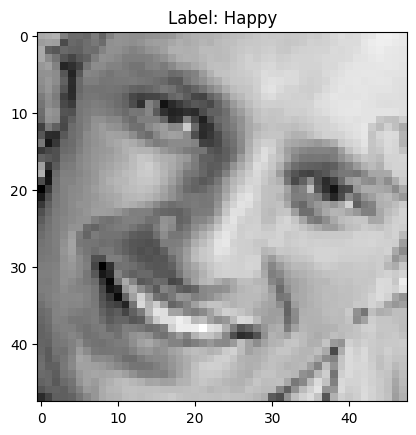

In [4]:
# Load the training data
X, Y = getBinaryfer13Data('fer3and4train.csv')

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Let's look at one example image
plt.imshow(X[0].reshape(48, 48), cmap='gray')
plt.title(f"Label: {'Happy' if Y[0] == 1 else 'Sad'}")
plt.show()

# PART 1 - Logistic regressor

In [5]:
class LRClass(object):
    def __init__(self):
        self.W = None
        self.b = 0

    def train(self, X, Y, step_size=10e-7, epochs=10000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape
        
        # (i) Initialize the weights W to small random numbers; bias to zero
        self.W, self.b = init_weight_and_bias(D, 1)   # W: (D,1), b: (1,)
        
        # For the given number of epochs selected, learn the weights
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        
        # (ii) Create a loop over the number of epochs specified. 
        for i in range(epochs):
            # (iii) Call the forward function to calculate P(Y|X) on training data
            pY_train = self.forward(X)      # shape (N,)

            # (iv) Gradient descent updates for W and b
            # dJ/dW = X^T (pY - Y)
            gradW = X.T.dot(pY_train - Y)           # shape (D,)
            gradb = (pY_train - Y).sum()            # scalar

            self.W -= step_size * gradW.reshape(self.W.shape)
            self.b -= step_size * gradb

            # (v) Compute predictions and costs for train and validation sets
            pY_valid = self.forward(Xvalid)

            train_cost = sigmoid_cost(Y, pY_train)
            valid_cost = sigmoid_cost(Yvalid, pY_valid)
            train_costs.append(train_cost)
            valid_costs.append(valid_cost)

            # validation error = 1 - accuracy
            valid_error = error_rate(Yvalid, np.round(pY_valid))
            if valid_error < best_validation_error:
                best_validation_error = valid_error

            # optional: print every 100 epochs so you see progress
            if i % 100 == 0:
                print(f"epoch {i}: train_cost={train_cost:.4f}, "
                      f"valid_cost={valid_cost:.4f}, valid_error={valid_error:.4f}")
        
        # (vi) Print your best validation error here
        print("best_validation_error:", best_validation_error)
        
        # (vii) Display the graph of the validation and training cost
        plt.plot(train_costs, label='train cost')
        plt.plot(valid_costs, label='validation cost')
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.legend()
        plt.show()
    
    # Implement the forward algorithm
    def forward(self, X):
        # X: (N, D), W: (D,1) or (D,)
        A = X.dot(self.W) + self.b          # linear part
        return sigmoid(A).flatten()         # squash to (N,) probabilities
    
    # Implement the prediction algorithm, calling forward
    def predict(self, X):
        pY = self.forward(X)                # probabilities
        return np.round(pY)                 # 0 or 1
    
    # Implement a method to compute accuracy or classification rate
    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)              # fraction correct

epoch 0: train_cost=8065.0840, valid_cost=725.8432, valid_error=0.5330
epoch 100: train_cost=7314.1695, valid_cost=667.9928, valid_error=0.3940
epoch 200: train_cost=7085.9754, valid_cost=651.3836, valid_error=0.3780
epoch 300: train_cost=6943.5707, valid_cost=641.4942, valid_error=0.3590
epoch 400: train_cost=6846.2992, valid_cost=634.9299, valid_error=0.3400
epoch 500: train_cost=6775.4299, valid_cost=630.2212, valid_error=0.3350
epoch 600: train_cost=6721.2126, valid_cost=626.6416, valid_error=0.3320
epoch 700: train_cost=6678.1249, valid_cost=623.7974, valid_error=0.3260
best_validation_error: 0.321


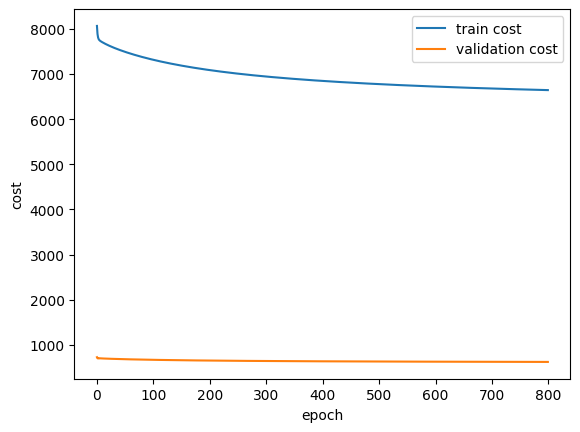

Accuracy of test set is: 0.706


In [11]:
#Call your logistic regression class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv')
lrObj = LRClass()
lrObj.train(X, Y, epochs = 800)

#(viii) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
test_accuracy = lrObj.score(testX, testY)
print("Accuracy of test set is:", test_accuracy)

### BONUS

In [12]:
class LRClassReg(object):
    def __init__(self, lambda_reg=0.01):
        self.W = None
        self.b = 0
        self.lambda_reg = lambda_reg  # regularization strength

    def train(self, X, Y, step_size=10e-7, epochs=800):
        # Same data split as before
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape

        # Initialize weights and bias
        self.W, self.b = init_weight_and_bias(D, 1)

        train_costs = []
        valid_costs = []
        best_validation_error = 1

        for i in range(epochs):
            # Forward pass on training data
            pY_train = self.forward(X)

            # Gradients with L2 regularization
            gradW = X.T.dot(pY_train - Y) + self.lambda_reg * self.W
            gradb = (pY_train - Y).sum()

            # Update parameters
            self.W -= step_size * gradW
            self.b -= step_size * gradb

            # Forward on validation data
            pY_valid = self.forward(Xvalid)

            # Costs (now including L2 penalty in the training cost)
            train_cost = sigmoid_cost(Y, pY_train) / len(Y) + 0.5 * self.lambda_reg * np.sum(self.W * self.W)
            valid_cost = sigmoid_cost(Yvalid, pY_valid) / len(Yvalid)
            train_costs.append(train_cost)
            valid_costs.append(valid_cost)

            valid_error = error_rate(Yvalid, np.round(pY_valid))
            if valid_error < best_validation_error:
                best_validation_error = valid_error

            if i % 100 == 0:
                print(f"[REG] epoch {i}: train_cost={train_cost:.4f}, "
                      f"valid_cost={valid_cost:.4f}, valid_error={valid_error:.4f}")

        print("[REG] best_validation_error:", best_validation_error)

        # Plot
        plt.plot(train_costs, label='train cost (reg)')
        plt.plot(valid_costs, label='validation cost (reg)')
        plt.xlabel("epoch")
        plt.ylabel("cost")
        plt.legend()
        plt.show()

    def forward(self, X):
        A = X.dot(self.W) + self.b
        return sigmoid(A).flatten()

    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

[REG] epoch 0: train_cost=0.7477, valid_cost=0.6950, valid_error=0.4690
[REG] epoch 100: train_cost=0.6601, valid_cost=0.6482, valid_error=0.3300
[REG] epoch 200: train_cost=0.6430, valid_cost=0.6312, valid_error=0.3250
[REG] epoch 300: train_cost=0.6323, valid_cost=0.6204, valid_error=0.3110
[REG] epoch 400: train_cost=0.6249, valid_cost=0.6129, valid_error=0.3070
[REG] epoch 500: train_cost=0.6196, valid_cost=0.6073, valid_error=0.2980
[REG] epoch 600: train_cost=0.6155, valid_cost=0.6029, valid_error=0.2940
[REG] epoch 700: train_cost=0.6123, valid_cost=0.5994, valid_error=0.2870
[REG] best_validation_error: 0.286


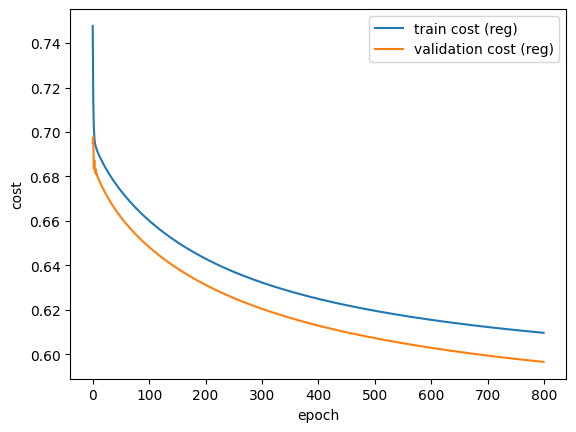

Test accuracy with L2 regularization: 0.7036666666666667


In [13]:
# Extra: Logistic regression with L2 regularization
X, Y = getBinaryfer13Data('fer3and4train.csv')
testX, testY = getBinaryfer13Data('fer3and4test.csv')

lrReg = LRClassReg(lambda_reg=0.01)
lrReg.train(X, Y, step_size=10e-7, epochs=800)

test_accuracy_reg = lrReg.score(testX, testY)
print("Test accuracy with L2 regularization:", test_accuracy_reg)

# PART 2 - SVM Classification

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#Train the SVM
trainX, trainY = getBinaryfer13Data('fer3and4train.csv')
#ADD CODE HERE...

#Test the SVM
#ADD CODE HERE...

#Report overall the accuracy from the results of the different SVM kernels
#
# Confusion matrix and classification reports are two functions in Scikit-learns
#   that provide detailed well-formated classification results
print(confusion_matrix(testY, predY))
print(classification_report(testY, predY))

# PART 3 - Freeform CNN Classification
First reshape the data into 48 x 48 image matrices  \
Then write your own freefrom CNN based classifier (make sure to include your imports and any auxilliary code) \
You may use downloaded code from the Internet but pls cite your source

In [3]:
#imports for CNN
